# Data Analysis

Initial exploration of Small Bodies database.

Need to add description/complete analysis

In [73]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re


os.getcwd()
# os.chdir('C:\\Users\\wren1\\Documents\\theory of machine learning\EN625.742_group_project\\src')

In [74]:
# read in data

df = pd.read_csv('data/sbdb_query_results.csv')
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35188 entries, 0 to 35187
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       35188 non-null  object 
 1   a               35188 non-null  float64
 2   e               35188 non-null  float64
 3   i               35188 non-null  float64
 4   om              35188 non-null  float64
 5   w               35188 non-null  float64
 6   q               35188 non-null  float64
 7   ad              35188 non-null  float64
 8   per_y           35188 non-null  float64
 9   data_arc        34876 non-null  float64
 10  condition_code  35187 non-null  float64
 11  n_obs_used      35188 non-null  int64  
 12  n_del_obs_used  1030 non-null   float64
 13  n_dop_obs_used  1030 non-null   float64
 14  H               35183 non-null  float64
 15  epoch_mjd       35188 non-null  int64  
 16  ma              35188 non-null  float64
 17  diameter        1246 non-null  

C:\Users\wren1\AppData\Local\Temp\ipykernel_15508\272207056.py:3: DtypeWarning: Columns (18,25,26,29,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/sbdb_query_results.csv')


In [75]:
# drop columns that are mostly null

columns_with_nulls = df.columns[df.isnull().sum() > len(df)*0.2]

df = df.drop(columns=columns_with_nulls)
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35188 entries, 0 to 35187
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       35188 non-null  object 
 1   a               35188 non-null  float64
 2   e               35188 non-null  float64
 3   i               35188 non-null  float64
 4   om              35188 non-null  float64
 5   w               35188 non-null  float64
 6   q               35188 non-null  float64
 7   ad              35188 non-null  float64
 8   per_y           35188 non-null  float64
 9   data_arc        34876 non-null  float64
 10  condition_code  35187 non-null  float64
 11  n_obs_used      35188 non-null  int64  
 12  H               35183 non-null  float64
 13  epoch_mjd       35188 non-null  int64  
 14  ma              35188 non-null  float64
 15  spkid           35188 non-null  int64  
 16  pdes            35188 non-null  object 
 17  neo             35188 non-null 

In [76]:
df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,...,sigma_ad,sigma_n,sigma_tp,sigma_per,class,producer,first_obs,last_obs,rms,orbit_id
0,433 Eros (A898 PA),1.458,0.2227,10.83,304.28,178.90,1.133,1.78,1.76,46582.0,...,1.900000e-10,9.100000e-11,0.000003,1.100000e-07,AMO,Giorgini,1893-10-29,5/13/2021,0.29796,659
1,719 Albert (A911 TB),2.636,0.5469,11.58,183.85,156.22,1.194,4.08,4.28,41042.0,...,3.900000e-09,3.300000e-10,0.000012,2.200000e-06,AMO,Otto Matic,10/4/1911,2/15/2024,0.40669,266
2,887 Alinda (A918 AA),2.472,0.5710,9.40,110.42,350.48,1.061,3.88,3.89,38861.0,...,1.800000e-09,1.800000e-10,0.000002,9.800000e-07,AMO,Otto Matic,2/3/1918,6/27/2024,0.43928,JPL 450
3,1036 Ganymed (A924 UB),2.665,0.5328,26.69,215.50,132.48,1.245,4.09,4.35,36408.0,...,2.100000e-09,1.800000e-10,0.000003,1.200000e-06,AMO,Otto Matic,10/23/1924,6/28/2024,0.32275,JPL 1195
4,1221 Amor (1932 EA1),1.920,0.4352,11.88,171.31,26.68,1.084,2.76,2.66,33450.0,...,1.400000e-09,2.800000e-10,0.000020,7.300000e-07,AMO,Otto Matic,3/12/1932,10/11/2023,0.45236,121


In [77]:
# Generate descriptive statistics for numeric and object columns
df.describe(include='all')


,full_name,a,e,i,om,w,q,ad,per_y,data_arc,...,sigma_ad,sigma_n,sigma_tp,sigma_per,class,producer,first_obs,last_obs,rms,orbit_id
count,35188,35188.000000,35188.000000,35188.000000,35188.000000,35188.000000,35188.000000,35188.000000,35188.000000,34876.000000,...,3.516300e+04,3.516300e+04,3.516300e+04,3.516300e+04,35188,35188,35188,35188,35188.000000,35188
unique,35188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,6,7212,5692,NaN,655
top,433 Eros (A898 PA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,APO,Otto Matic,4/23/2014,6/28/2024,NaN,JPL 2
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19894,35100,75,95,NaN,1599
mean,NaN,1.763918,0.437181,11.999026,171.810679,182.560747,0.914283,2.613554,2.664423,1390.779361,...,2.889166e-01,3.951964e-03,2.950168e+00,8.926102e+02,NaN,NaN,NaN,NaN,0.475209,NaN
std,NaN,2.109032,0.177058,10.683500,103.537526,104.267499,0.224809,4.199186,34.330101,3063.940901,...,4.748647e+01,1.176772e-01,3.379325e+02,1.600344e+05,NaN,NaN,NaN,NaN,0.124577,NaN
min,NaN,0.461700,0.002800,0.010000,0.010000,0.000000,0.070000,0.650000,0.314000,1.000000,...,5.100000e-11,3.900000e-11,2.300000e-08,2.300000e-08,NaN,NaN,NaN,NaN,0.023109,NaN
25%,NaN,1.294000,0.304200,4.420000,80.277500,93.350000,0.791000,1.670000,1.470000,7.000000,...,2.800000e-07,9.350000e-08,3.900000e-04,1.400000e-04,NaN,NaN,NaN,NaN,0.391180,NaN
50%,NaN,1.693000,0.451700,8.490000,171.620000,184.560000,0.963000,2.440000,2.200000,25.000000,...,5.000000e-04,1.900000e-04,3.300000e-02,2.500000e-01,NaN,NaN,NaN,NaN,0.466965,NaN
75%,NaN,2.171000,0.564900,16.790000,252.162500,272.602500,1.060000,3.350000,3.200000,1098.000000,...,3.900000e-03,1.000000e-03,3.700000e-01,1.900000e+00,NaN,NaN,NaN,NaN,0.548560,NaN


In [78]:
df['first_obs']

0        1893-10-29
1         10/4/1911
2          2/3/1918
3        10/23/1924
4         3/12/1932
            ...    
35183     6/27/2024
35184     6/27/2024
35185     6/11/2024
35186     6/27/2024
35187     9/24/1960
Name: first_obs, Length: 35188, dtype: object

In [81]:

# Function to convert 'YYYY-MM-DD.D' to datetime
def convert_to_datetime(row, col):
    date_part, day_fraction = row[col].split('.')
    date_dt = pd.to_datetime(date_part, format='%Y-%m-%d')
    day_fraction_td = pd.to_timedelta(float('0.' + day_fraction) * 24, unit='hours')
    return date_dt + day_fraction_td

# print(df.dtypes)

#keep julian dates as numeric and convert calendar dates to datetime

df['epoch_cal'] = df.apply(convert_to_datetime, args=('epoch_cal',), axis=1)

df['tp_cal'] = df.apply(convert_to_datetime, args=('tp_cal',), axis=1)

#extract year and month from the observed dates


df['first_obs_year'] = pd.to_numeric(df['first_obs'].apply(lambda x: re.split('-|/', x)[0]), errors='coerce').astype('Int64')
df['first_obs_month'] = pd.to_numeric(df['first_obs'].apply(lambda x: re.split('-|/', x)[1]), errors='coerce').astype('Int64')
df['last_obs_year'] = pd.to_numeric(df['last_obs'].apply(lambda x: re.split('-|/', x)[0]), errors='coerce').astype('Int64')
df['last_obs_month'] = pd.to_numeric(df['last_obs'].apply(lambda x: re.split('-|/', x)[1]), errors='coerce').astype('Int64')

#convert julian dates to numeric
date_jd = ['epoch','tp']
df[date_jd] = df[date_jd].apply(pd.to_numeric)

,full_name_ (1979 XB),full_name_ (1982 YA),full_name_ (1986 NA),full_name_ (1988 NE),full_name_ (1989 AZ),full_name_ (1990 UN),full_name_ (1991 BA),full_name_ (1991 GO),full_name_ (1991 JR),full_name_ (1991 TT),...,orbit_id_JPL 92,orbit_id_JPL 93,orbit_id_JPL 94,orbit_id_JPL 95,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_JPL 992,orbit_id_MPO508629
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:

#encode categorical variables - one hot encoding generates too many to use, so we will use label encoding
#in actual model, try target encoding

nominal = ['full_name','neo','pdes', 'pha', 'class','producer', 'orbit_id']

encoded =pd.get_dummies(data=df[nominal])

# encoded

from sklearn.preprocessing import LabelEncoder

# Iterate over each categorical variable in the nominal list
for column in nominal:
    # Create a new instance of LabelEncoder for each categorical variable
    le = LabelEncoder()
    
    # Fit the label encoder and transform the data to encode it
    # Use .astype(str) to ensure all data is treated as strings
    df[column + '_encoded'] = le.fit_transform(df[column].astype(str))



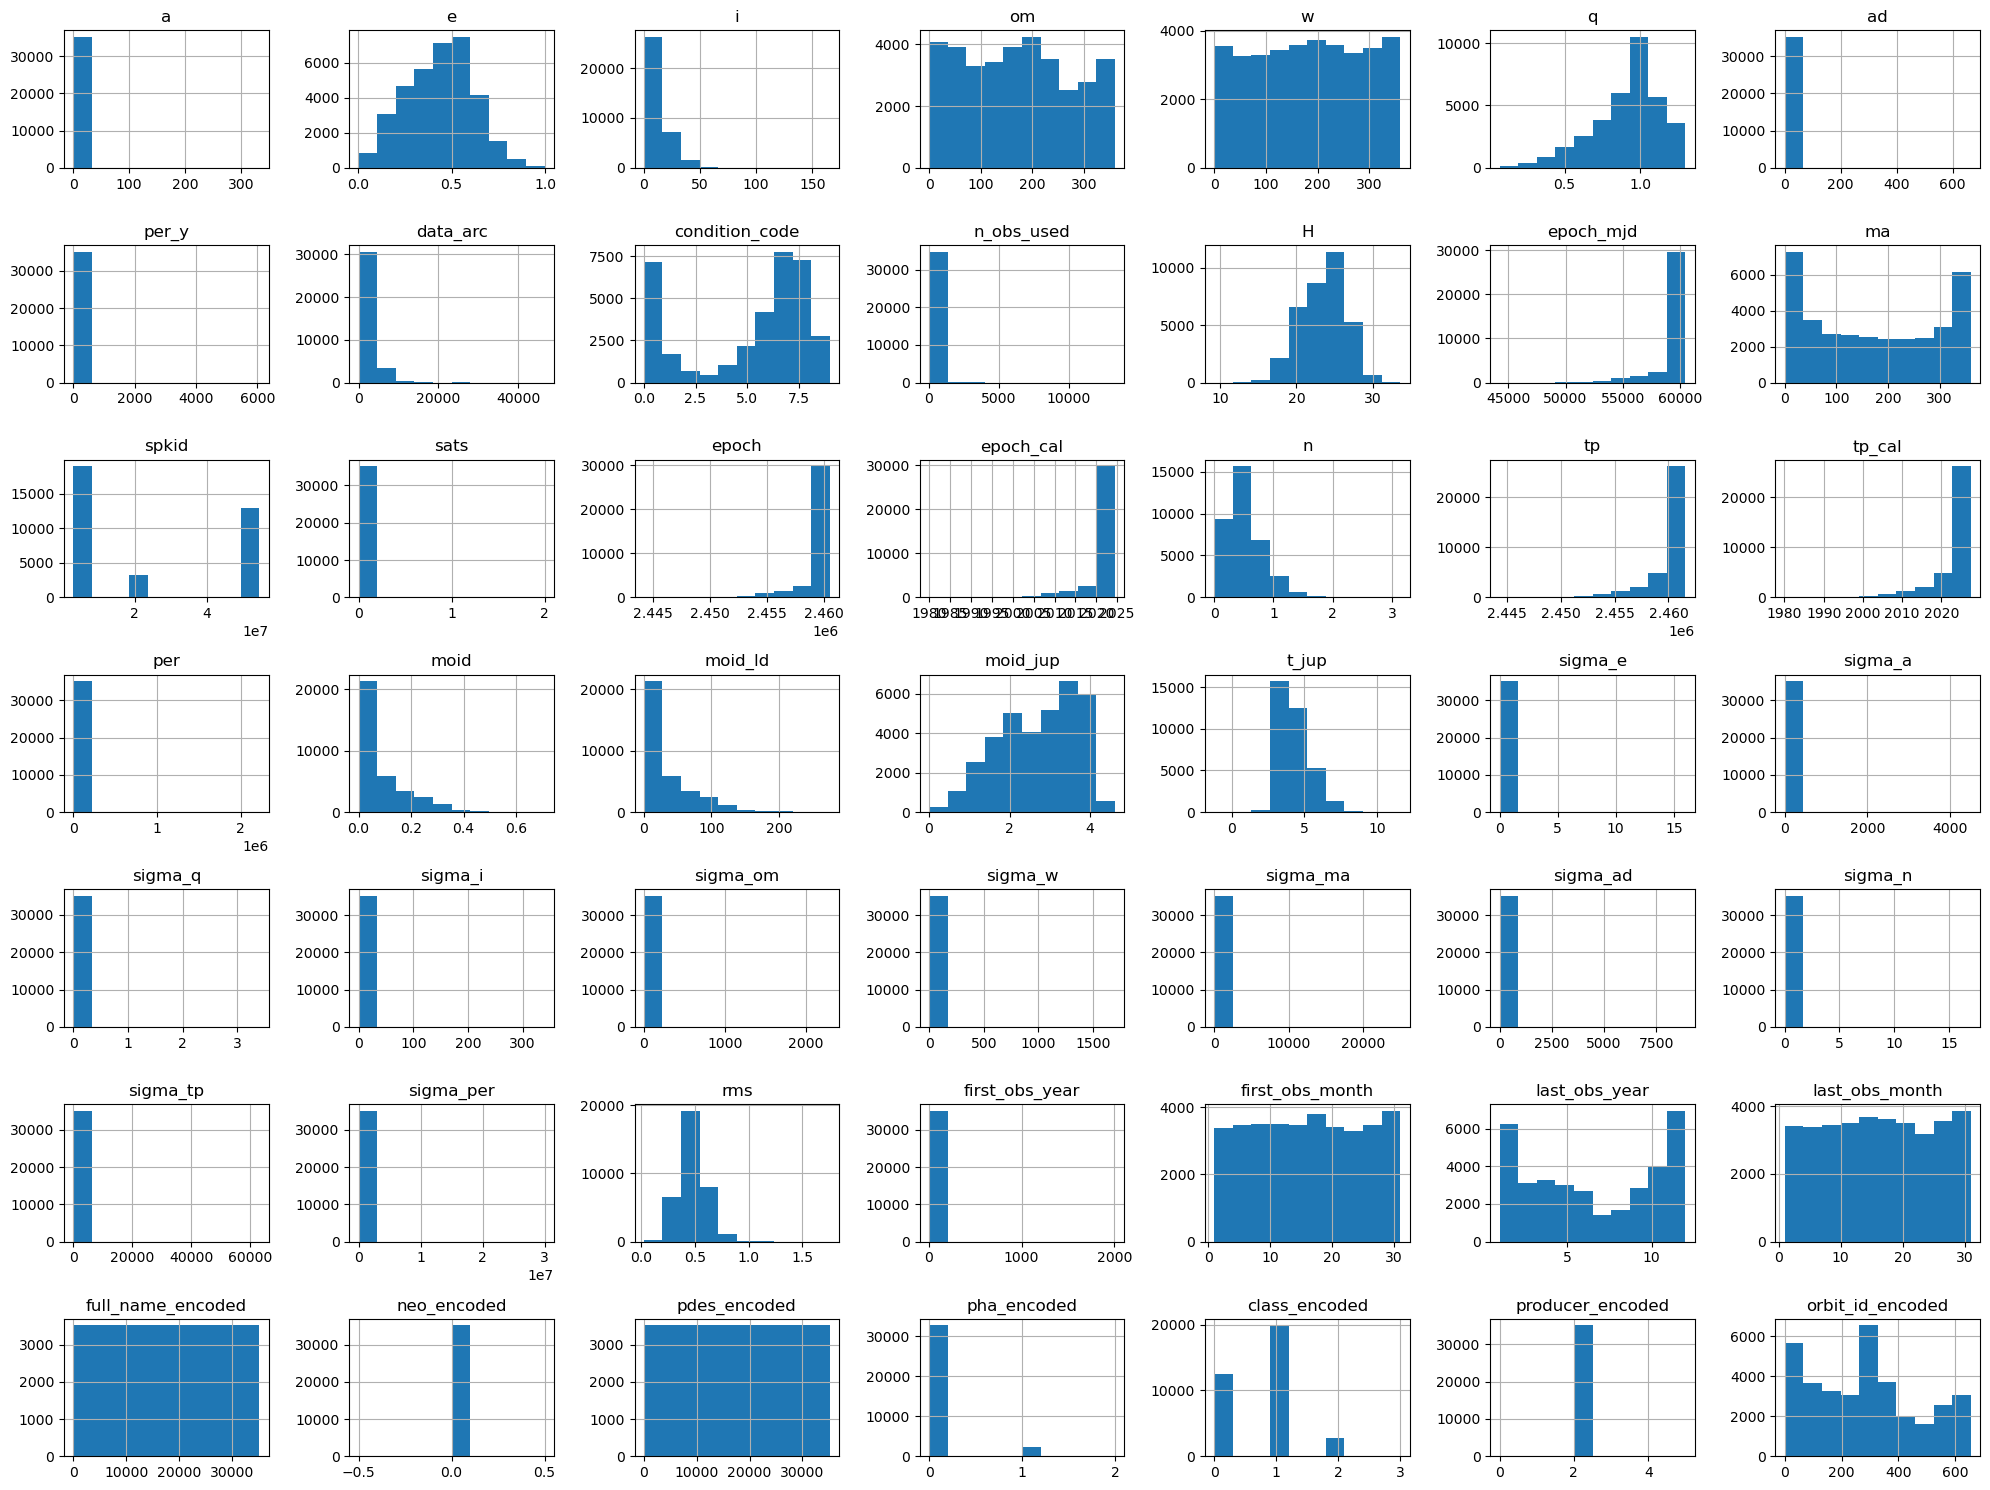

In [83]:
# Assuming df is your DataFrame
df.hist(figsize=(20, 15))
plt.tight_layout()  # Adjusts subplot params for a nice fit
plt.show()  # Displays the histogram

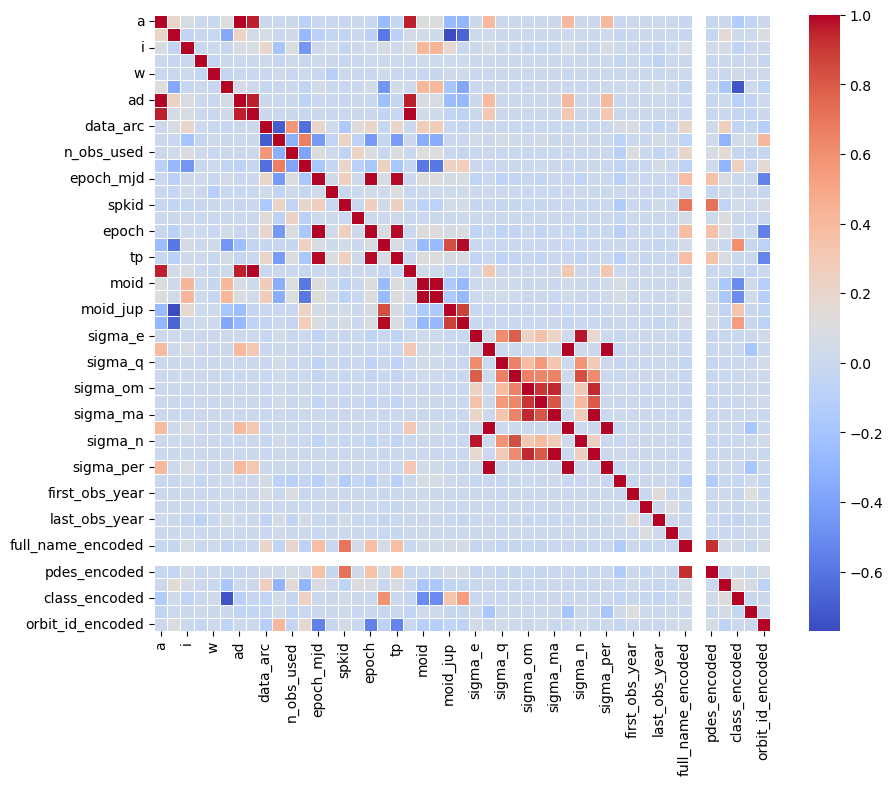

In [85]:
# check correlation - probably want to distinguish between numeric and categorical variables, to do later

# Calculate the correlation matrix (pearson I believe)
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjusts the size of the figure
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.show()

In [ ]:
# cramer's V for categorical variables

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V for each pair of categorical variables

# to do


In [91]:
# check for outliers


from sklearn.ensemble import IsolationForest

# Assuming 'df' is your DataFrame and you want to check all columns for outliers
# Adjust n_estimators and contamination as needed
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
iso_forest.fit(numeric_df.dropna())

# Predict outliers (-1 for outliers, 1 for inliers)
outliers = iso_forest.predict(numeric_df.dropna())

# Display the number of outliers
outliers_count = (outliers == -1).sum()
outliers_count
print(outliers_count/len(numeric_df.dropna())*100)

# 1 percent outliers

1.0015209343702471
